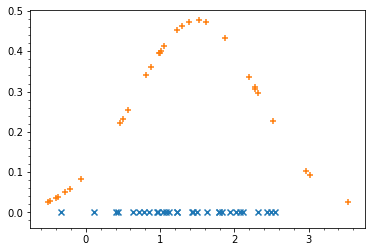

In [89]:
import numpy as np
from numpy.random import default_rng
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import math

rg = default_rng()

mu, sigma = 1.5, 0.7

plt.minorticks_on()

data = rg.normal(mu,sigma,30)

plt.scatter(data,np.zeros((30,)),marker="x")

x = rg.uniform(mu - 3 * sigma, mu + 3 * sigma, 30)

y = multivariate_normal([mu],[sigma])

plt.scatter(x,y.pdf(x),marker="+")

[[0.50475022 0.50475022]
 [0.50475022 0.50475022]]
[[ 0.50475022 -0.00954239]
 [-0.00954239  0.04674137]]


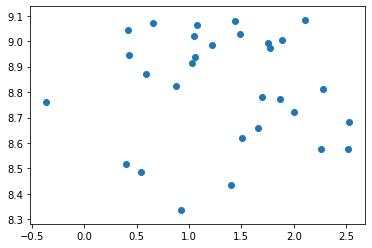

In [93]:
mu, sigma = np.array([1.5, 8.7]), np.array([0.7, 0.2])
x0 = rg.normal(mu[0],sigma[0],30)
x1 = rg.normal(mu[1],sigma[1],30)

plt.scatter(x0,x1)

print(np.cov(np.array([x0,x0])))
cov=np.cov(np.array([x0,x1]))
print(cov)

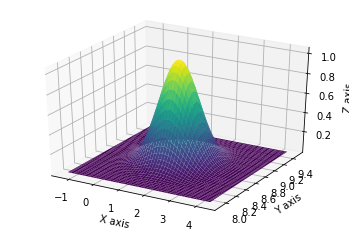

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
#from mpl_toolkits.mplot3d import Axes3D

#Crea la griglia e la distribuzione multivariata
x = np.linspace(mu[0] - 4*sigma[0],mu[0] + 4*sigma[0],500)
y = np.linspace(mu[1] - 4*sigma[1],mu[1] + 4*sigma[1],500)

X, Y = np.meshgrid(x,y)  # array di coordinate x ed y separate,
                         # di dimensione (500, 500)

pos = np.empty(X.shape + (2,))     # pos.shape = (500, 500, 2)
pos[:, :, 0] = X; pos[:, :, 1] = Y # crea l'array dei punti del grafico

rv = multivariate_normal(mu, cov)

#Crea un plot 3D
fig = plt.figure()
ax = fig.gca(projection='3d') # acquisisce l'istanza di Axes3D della figura
                              # e di fatto genera un plot 3D

ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()